In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data=pd.read_excel('E:\CV\projects\Airlines tickets Price prediction\Data_Train.xlsx')
train_data               

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# data pre-process

In [9]:
df=train_data.copy()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


work on 'Date_of_Journey' column

In [10]:
def change_to_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [11]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
cols=['Date_of_Journey','Dep_Time','Arrival_Time']
for col in cols:
    change_to_datetime(col)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [14]:
df['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [15]:
df['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

our data belongs to 2019 only

In [16]:
df['journey day']=df['Date_of_Journey'].dt.day
df['journey month']=df['Date_of_Journey'].dt.month
df['journey year']=df['Date_of_Journey'].dt.year
df.drop('Date_of_Journey',axis=1,inplace=True)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,journey year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-09-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-28 05:50:00,2022-09-28 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-09-28 18:05:00,2022-09-28 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-09-28 16:50:00,2022-09-28 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-09-28 19:55:00,2022-09-28 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-09-28 20:45:00,2022-09-28 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-09-28 08:20:00,2022-09-28 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,2022-09-28 11:30:00,2022-09-28 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


work on 'Dep_Time' and 'Arrival_Time' columns

In [17]:
def extract_hour_minute(col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head()

In [18]:
extract_hour_minute('Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,journey year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-28 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-09-28 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-09-28 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [19]:
extract_hour_minute('Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,journey year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


#  Analyse when will most of the flights will take-off

In [20]:
def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if ( x> 4) and (x<=8 ):
        return 'Early mrng'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'Noon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

<AxesSubplot:>

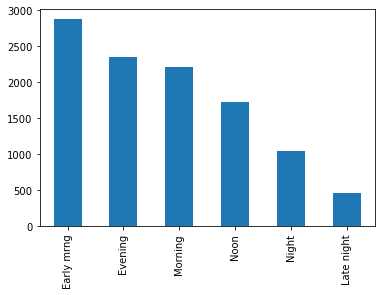

In [21]:
df['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot.bar()

<AxesSubplot:ylabel='Dep_Time_hour'>

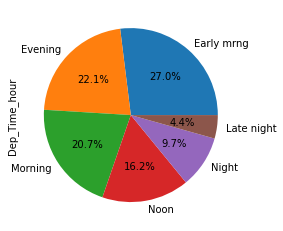

In [22]:
df['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot.pie(autopct="%1.1f%%")

In [23]:
!pip install cufflinks

In [24]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [25]:
cf.go_offline()

In [26]:
df['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,journey year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


lets preprocess 'Duration' column

In [28]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x    

In [29]:
df['Duration']=df['Duration'].apply(preprocess_duration)
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,journey year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10


In [30]:
df['Duration'][0]

'2h 50m'

In [31]:
df['Duration'][0].split(' ')

['2h', '50m']

In [32]:
df['Duration'][0].split(' ')

['2h', '50m']

In [33]:
df['Duration'][0].split(' ')[0][0:-1]

'2'

In [34]:
int(df['Duration'][0].split(' ')[0][0:-1])

2

In [35]:
int(df['Duration'][0].split(' ')[1][0:-1])

50

In [36]:
df['Duration_hours']=df['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))


In [37]:
df['Duration_minutes']=df['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [38]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,journey year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10,2,40


In [39]:
df['Duration_total_mins']=(df['Duration_hours']*60)+(df['Duration_minutes'])
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,journey year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25,2,30,150
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10,2,40,160


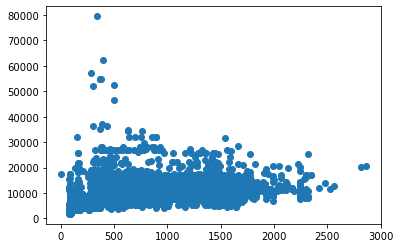

In [40]:
plt.scatter(data=df,x='Duration_total_mins',y='Price')

#  which city has maximum final destination of flights ?

In [41]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:ylabel='Destination'>

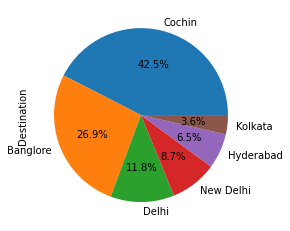

In [42]:
df['Destination'].value_counts().plot.pie(autopct='%1.1f%%')

Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,


# Exploratory Data Analysis(Bivariate Analysis)

on which route Jet Airways is extremely used?

In [43]:
df[df['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False).to_frame()

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
BOM → HYD,207
DEL → JAI → BOM → COK,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


# Airline vs Price Analysis

ie finding price distribution & 5-point summary of each Airline

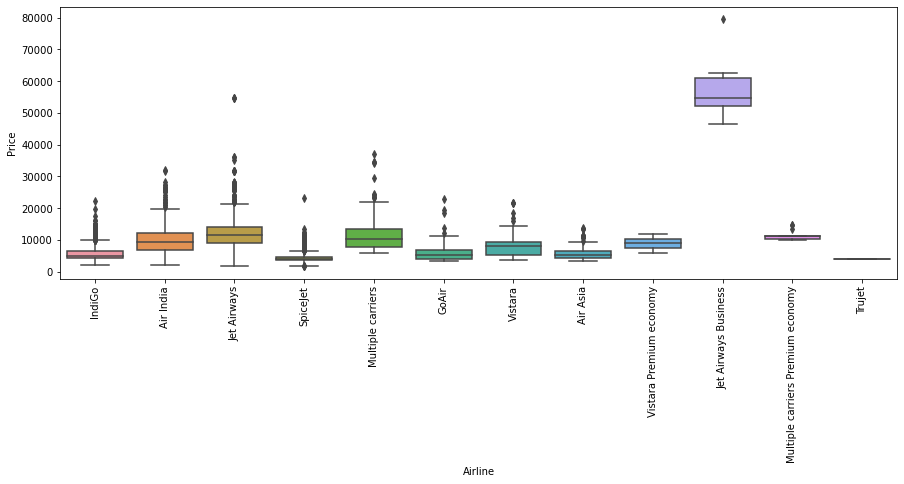

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='Airline',y='Price')
plt.xticks(rotation=90)
plt.show()

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

# Lets Perform Feature-Encoding on Data !
    Applying one-hot on data !

In [45]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,journey year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


drop un-necessary columns

In [46]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Additional_Info contains almost 80% no_info,so we can drop this column..


we can drop Route as well as we have pre-process that column..


 lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"

In [47]:
df.drop(['Additional_Info','Route','Duration_total_mins','journey year'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey day,journey month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45



# Lets separate categorical data & numerical data !
categorical data are those whose data-type is 'object'  ..
Numerical data are those whose data-type is either int of float

In [48]:
cat_col=[col for col in df.columns if df[col].dtype=='object']
num_col=[col for col in df.columns if df[col].dtype!='object']

In [49]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [50]:
num_col

['Price',
 'journey day',
 'journey month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

# Handling Categorical Data

Lets apply one-hot encoding on 'Source' column

In [51]:
new_source=pd.get_dummies(df['Source'])

In [52]:
df=pd.concat([df,new_source],axis=1)
df

,Airline,Source,Destination,Duration,Total_Stops,Price,journey day,journey month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,4,9,19,55,22,25,2,30,0,0,0,1,0
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,20,45,23,20,2,35,0,0,0,1,0
10680,Jet Airways,Banglore,Delhi,3h 0m,non-stop,7229,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,3,1,11,30,14,10,2,40,1,0,0,0,0


In [53]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

we can apply on-hot-encoding but if we have more sub-categories , it creates curse of dimensionality in ML

so we use Target Guided Mean Encoding in order to get rid of this..

In [54]:
airlines=df.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [55]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [56]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [57]:
df['Airline']=df['Airline'].map(dict1)

In [58]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,journey day,journey month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,0,0,1,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,0,0,1,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,Banglore,2h 30m,non-stop,4107,4,9,19,55,22,25,2,30,0,0,0,1,0
10679,7,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,20,45,23,20,2,35,0,0,0,1,0
10680,10,Banglore,Delhi,3h 0m,non-stop,7229,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,Banglore,New Delhi,2h 40m,non-stop,12648,3,1,11,30,14,10,2,40,1,0,0,0,0


data['Destination'].replace('New Delhi','Delhi',inplace=True) we will consider New Delhi & Delhi as same ...

In [59]:
df['Destination'].replace('New Delhi','Delhi',inplace=True)

In [60]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [61]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,journey day,journey month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,3,Banglore,Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,0,0,1,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,0,0,1,0
4,3,Banglore,Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,Banglore,2h 30m,non-stop,4107,4,9,19,55,22,25,2,30,0,0,0,1,0
10679,7,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,20,45,23,20,2,35,0,0,0,1,0
10680,10,Banglore,Delhi,3h 0m,non-stop,7229,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,Banglore,Delhi,2h 40m,non-stop,12648,3,1,11,30,14,10,2,40,1,0,0,0,0


In [62]:
Destinations=df.groupby(['Destination'])['Price'].mean().sort_values().index
Destinations

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [63]:
dict2={key:index for index,key in enumerate(Destinations,0)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [64]:
df['Destination']=df['Destination'].map(dict2)

In [65]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,journey day,journey month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,0,0,1,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,0,0,1,0
4,3,Banglore,2,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,3,2h 30m,non-stop,4107,4,9,19,55,22,25,2,30,0,0,0,1,0
10679,7,Kolkata,3,2h 35m,non-stop,4145,27,4,20,45,23,20,2,35,0,0,0,1,0
10680,10,Banglore,2,3h 0m,non-stop,7229,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,Banglore,2,2h 40m,non-stop,12648,3,1,11,30,14,10,2,40,1,0,0,0,0



Perform Manual Encoding on Total_stops column


In [66]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [67]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [68]:
df['Total_Stops']=df['Total_Stops'].map(stops)
df

,Airline,Source,Destination,Duration,Total_Stops,Price,journey day,journey month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,0,0,1,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,0,0,1,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,3,2h 30m,0,4107,4,9,19,55,22,25,2,30,0,0,0,1,0
10679,7,Kolkata,3,2h 35m,0,4145,27,4,20,45,23,20,2,35,0,0,0,1,0
10680,10,Banglore,2,3h 0m,0,7229,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,Banglore,2,2h 40m,0,12648,3,1,11,30,14,10,2,40,1,0,0,0,0


# Performing Outlier Detection !
Here the list of data visualization plots to spot the outliers

In [69]:
def plot(col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



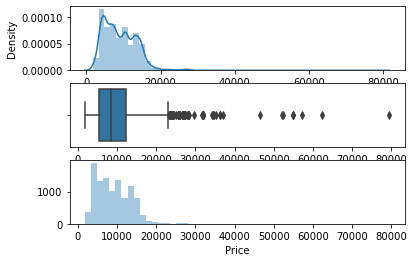

In [70]:
plot('Price')

In [76]:
df['Price']=np.where(df['Price']>=35000,df['Price'].median(),df['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



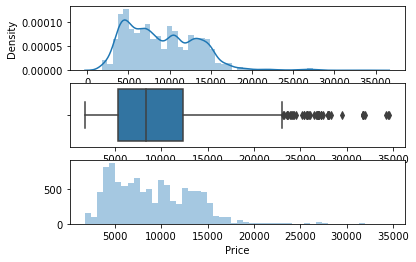

In [77]:
plot('Price')

In [78]:
df['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [73]:
df.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [74]:
df.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Price                  int64
journey day            int64
journey month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int64
Duration_minutes       int64
Banglore               uint8
Chennai                uint8
Delhi                  uint8
Kolkata                uint8
Mumbai                 uint8
dtype: object

In [79]:
df

,Airline,Destination,Total_Stops,Price,journey day,journey month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,0,0,1,0
2,10,4,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,5,12,18,5,23,30,5,25,0,0,0,1,0
4,3,2,1,13302.0,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4107.0,4,9,19,55,22,25,2,30,0,0,0,1,0
10679,7,3,0,4145.0,27,4,20,45,23,20,2,35,0,0,0,1,0
10680,10,2,0,7229.0,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,12648.0,3,1,11,30,14,10,2,40,1,0,0,0,0


# Performing Feature Selection 

In [81]:
from sklearn.feature_selection import mutual_info_regression,f_regression
from sklearn.ensemble import ExtraTreesClassifier

In [83]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [84]:
mutual_info_regression(X,y)

array([0.97083529, 1.00907474, 0.7871842 , 0.18926317, 0.24809681,
       0.34323855, 0.25743355, 0.39832628, 0.34612692, 0.47067294,
       0.34139842, 0.39578258, 0.12853542, 0.51950715, 0.46656427,
       0.19687138])

In [87]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [88]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.006642
Airline,0.978261
Total_Stops,0.784047
Delhi,0.524788
Duration_hours,0.467573
Kolkata,0.460738
Arrival_Time_hour,0.403364
Banglore,0.394809
Arrival_Time_minute,0.347980
Duration_minutes,0.345719


# Split Data to train and test

In [92]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# ML Model

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression



In [139]:
from sklearn.metrics import r2_score


In [142]:
def ml_model(algorithm):
    model=algorithm
    print(f'Accuracy for model {model}  \n')
    model.fit(X_train,y_train)
    Train_score=model.score(X_train,y_train)
    print(f'train score = {Train_score}')
    y_pred=model.predict(X_test)
    Test_score=r2_score(y_pred,y_test)
    print(f'Train Score = {Test_score}')

    

In [143]:
ml_model(RandomForestRegressor())

Accuracy for model RandomForestRegressor()  

train score = 0.9586352691117546
Train Score = 0.7649282874814063
